# 1.0.0 Regular expressions & word tokenization

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import re

from nltk.tokenize import sent_tokenize, word_tokenize, regexp_tokenize, TweetTokenizer

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import warnings
warnings.filterwarnings("ignore")

In [3]:
import sys
sys.path.append("../") 

from utils.info import holy_grail

## 1.1.2 Which pattern?

Which of the following Regex patterns results in the following text?


```python

my_string = "Let's write RegEx!"
re.findall(PATTERN, my_string)
['Let', 's', 'write', 'RegEx']

```

In [4]:
my_string = "Let's write RegEx!"
PATTERN = r"\w+"
re.findall(PATTERN, my_string)

['Let', 's', 'write', 'RegEx']

## 1.1.3 Practicing regular expressions: re.split() and re.findall()

- Split my_string on each sentence ending. To do this:
    - Write a pattern called sentence_endings to match sentence endings (.?!).
    - Use re.split() to split my_string on the pattern and print the result.

In [5]:
my_string = "Let's write RegEx!  Won't that be fun?  I sure think so.  Can you find 4 sentences?  Or perhaps, all 19 words?"

In [6]:
# Write a pattern to match sentence endings: sentence_endings
sentence_endings = r"[.?!]"

# Split my_string on sentence endings and print the result
print(re.split(sentence_endings, my_string))

["Let's write RegEx", "  Won't that be fun", '  I sure think so', '  Can you find 4 sentences', '  Or perhaps, all 19 words', '']


In [7]:
# Find all capitalized words in my_string and print the result
capitalized_words = r"[A-Z]\w+"
print(re.findall(capitalized_words, my_string))

['Let', 'RegEx', 'Won', 'Can', 'Or']


In [8]:
# Split my_string on spaces and print the result
spaces = r"\s+"
print(re.split(spaces, my_string))

["Let's", 'write', 'RegEx!', "Won't", 'that', 'be', 'fun?', 'I', 'sure', 'think', 'so.', 'Can', 'you', 'find', '4', 'sentences?', 'Or', 'perhaps,', 'all', '19', 'words?']


In [9]:
# Find all digits in my_string and print the result
digits = r"\d+"
print(re.findall(digits, my_string))

['4', '19']


## 1.1.5 Word tokenization with NLTK

In [10]:
scene_one = "SCENE 1: [wind] [clop clop clop] \nKING ARTHUR: Whoa there!  [clop clop clop] \nSOLDIER #1: Halt!  Who goes there?\nARTHUR: It is I, Arthur, son of Uther Pendragon, from the castle of Camelot.  King of the Britons, defeator of the Saxons, sovereign of all England!\nSOLDIER #1: Pull the other one!\nARTHUR: I am, ...  and this is my trusty servant Patsy.  We have ridden the length and breadth of the land in search of knights who will join me in my court at Camelot.  I must speak with your lord and master.\nSOLDIER #1: What?  Ridden on a horse?\nARTHUR: Yes!\nSOLDIER #1: You're using coconuts!\nARTHUR: What?\nSOLDIER #1: You've got two empty halves of coconut and you're bangin' 'em together.\nARTHUR: So?  We have ridden since the snows of winter covered this land, through the kingdom of Mercea, through--\nSOLDIER #1: Where'd you get the coconuts?\nARTHUR: We found them.\nSOLDIER #1: Found them?  In Mercea?  The coconut's tropical!\nARTHUR: What do you mean?\nSOLDIER #1: Well, this is a temperate zone.\nARTHUR: The swallow may fly south with the sun or the house martin or the plover may seek warmer climes in winter, yet these are not strangers to our land?\nSOLDIER #1: Are you suggesting coconuts migrate?\nARTHUR: Not at all.  They could be carried.\nSOLDIER #1: What?  A swallow carrying a coconut?\nARTHUR: It could grip it by the husk!\nSOLDIER #1: It's not a question of where he grips it!  It's a simple question of weight ratios!  A five ounce bird could not carry a one pound coconut.\nARTHUR: Well, it doesn't matter.  Will you go and tell your master that Arthur from the Court of Camelot is here.\nSOLDIER #1: Listen.  In order to maintain air-speed velocity, a swallow needs to beat its wings forty-three times every second, right?\nARTHUR: Please!\nSOLDIER #1: Am I right?\nARTHUR: I'm not interested!\nSOLDIER #2: It could be carried by an African swallow!\nSOLDIER #1: Oh, yeah, an African swallow maybe, but not a European swallow.  That's my point.\nSOLDIER #2: Oh, yeah, I agree with that.\nARTHUR: Will you ask your master if he wants to join my court at Camelot?!\nSOLDIER #1: But then of course a-- African swallows are non-migratory.\nSOLDIER #2: Oh, yeah...\nSOLDIER #1: So they couldn't bring a coconut back anyway...  [clop clop clop] \nSOLDIER #2: Wait a minute!  Supposing two swallows carried it together?\nSOLDIER #1: No, they'd have to have it on a line.\nSOLDIER #2: Well, simple!  They'd just use a strand of creeper!\nSOLDIER #1: What, held under the dorsal guiding feathers?\nSOLDIER #2: Well, why not?\n"

In [11]:
# Split scene_one into sentences: sentences
sentences = sent_tokenize(scene_one)
sentences

['SCENE 1: [wind] [clop clop clop] \nKING ARTHUR: Whoa there!',
 '[clop clop clop] \nSOLDIER #1: Halt!',
 'Who goes there?',
 'ARTHUR: It is I, Arthur, son of Uther Pendragon, from the castle of Camelot.',
 'King of the Britons, defeator of the Saxons, sovereign of all England!',
 'SOLDIER #1: Pull the other one!',
 'ARTHUR: I am, ...  and this is my trusty servant Patsy.',
 'We have ridden the length and breadth of the land in search of knights who will join me in my court at Camelot.',
 'I must speak with your lord and master.',
 'SOLDIER #1: What?',
 'Ridden on a horse?',
 'ARTHUR: Yes!',
 "SOLDIER #1: You're using coconuts!",
 'ARTHUR: What?',
 "SOLDIER #1: You've got two empty halves of coconut and you're bangin' 'em together.",
 'ARTHUR: So?',
 "We have ridden since the snows of winter covered this land, through the kingdom of Mercea, through--\nSOLDIER #1: Where'd you get the coconuts?",
 'ARTHUR: We found them.',
 'SOLDIER #1: Found them?',
 'In Mercea?',
 "The coconut's tropic

In [12]:
# Use word_tokenize to tokenize the fourth sentence: tokenized_sent
tokenized_sent = word_tokenize(sentences[3])
tokenized_sent

['ARTHUR',
 ':',
 'It',
 'is',
 'I',
 ',',
 'Arthur',
 ',',
 'son',
 'of',
 'Uther',
 'Pendragon',
 ',',
 'from',
 'the',
 'castle',
 'of',
 'Camelot',
 '.']

In [13]:
# Make a set of unique tokens in the entire scene: unique_tokens
unique_tokens = set(word_tokenize(scene_one))
# Print the unique tokens result
print(unique_tokens)

{'swallows', 'who', 'seek', 'wings', 'What', 'pound', 'master', 'Britons', 'Are', 'land', 'wants', 'if', 'times', 'is', ',', 'he', 'got', 'grips', 'here', 'by', 'yet', 'are', 'velocity', 'under', 'mean', 'point', '...', 'simple', 'carried', 'Arthur', 'in', 'Where', 'trusty', 'guiding', 'swallow', 'bring', '.', 'clop', 'servant', 'maintain', 'plover', 'Who', 'Found', 'strangers', 'suggesting', 'to', 'house', 'of', 'question', 'air-speed', 'its', 'But', 'will', 'lord', 'back', 'together', 'Uther', 'Halt', '!', 'goes', 'do', 'It', 'non-migratory', 'dorsal', 'Whoa', 'the', "'", 'not', 'Listen', 'length', 'halves', 'beat', 'held', 'climes', 'through', 'empty', 'five', "'d", 'No', 'England', '1', 'one', 'martin', 'but', 'I', 'on', 'an', 'snows', 'yeah', 'be', 'coconut', 'Am', 'husk', 'ARTHUR', 'must', 'Pull', 'ask', 'south', 'weight', 'needs', 'King', 'We', 'you', 'why', 'found', 'temperate', 'it', 'KING', "'em", ':', 'son', 'line', 'Will', 'Patsy', 'strand', 'they', 'and', 'castle', 'since'

## 1.1.6 More regex with re.search()

In [14]:
scene_one = "SCENE 1: [wind] [clop clop clop] \nKING ARTHUR: Whoa there!  [clop clop clop] \nSOLDIER #1: Halt!  Who goes there?\nARTHUR: It is I, Arthur, son of Uther Pendragon, from the castle of Camelot.  King of the Britons, defeator of the Saxons, sovereign of all England!\nSOLDIER #1: Pull the other one!\nARTHUR: I am, ...  and this is my trusty servant Patsy.  We have ridden the length and breadth of the land in search of knights who will join me in my court at Camelot.  I must speak with your lord and master.\nSOLDIER #1: What?  Ridden on a horse?\nARTHUR: Yes!\nSOLDIER #1: You're using coconuts!\nARTHUR: What?\nSOLDIER #1: You've got two empty halves of coconut and you're bangin' 'em together.\nARTHUR: So?  We have ridden since the snows of winter covered this land, through the kingdom of Mercea, through--\nSOLDIER #1: Where'd you get the coconuts?\nARTHUR: We found them.\nSOLDIER #1: Found them?  In Mercea?  The coconut's tropical!\nARTHUR: What do you mean?\nSOLDIER #1: Well, this is a temperate zone.\nARTHUR: The swallow may fly south with the sun or the house martin or the plover may seek warmer climes in winter, yet these are not strangers to our land?\nSOLDIER #1: Are you suggesting coconuts migrate?\nARTHUR: Not at all.  They could be carried.\nSOLDIER #1: What?  A swallow carrying a coconut?\nARTHUR: It could grip it by the husk!\nSOLDIER #1: It's not a question of where he grips it!  It's a simple question of weight ratios!  A five ounce bird could not carry a one pound coconut.\nARTHUR: Well, it doesn't matter.  Will you go and tell your master that Arthur from the Court of Camelot is here.\nSOLDIER #1: Listen.  In order to maintain air-speed velocity, a swallow needs to beat its wings forty-three times every second, right?\nARTHUR: Please!\nSOLDIER #1: Am I right?\nARTHUR: I'm not interested!\nSOLDIER #2: It could be carried by an African swallow!\nSOLDIER #1: Oh, yeah, an African swallow maybe, but not a European swallow.  That's my point.\nSOLDIER #2: Oh, yeah, I agree with that.\nARTHUR: Will you ask your master if he wants to join my court at Camelot?!\nSOLDIER #1: But then of course a-- African swallows are non-migratory.\nSOLDIER #2: Oh, yeah...\nSOLDIER #1: So they couldn't bring a coconut back anyway...  [clop clop clop] \nSOLDIER #2: Wait a minute!  Supposing two swallows carried it together?\nSOLDIER #1: No, they'd have to have it on a line.\nSOLDIER #2: Well, simple!  They'd just use a strand of creeper!\nSOLDIER #1: What, held under the dorsal guiding feathers?\nSOLDIER #2: Well, why not?\n"

In [15]:
# Search for the first occurrence of "coconuts" in scene_one: match
match = re.search("coconuts", scene_one)

# Print the start and end indexes of match
print(match.start(), match.end())

580 588


In [16]:
# Write a regular expression to search for anything in square brackets: pattern1
pattern1 = r"\[.*\]"

# Use re.search to find the first text in square brackets
print(re.search(pattern1, scene_one))

<re.Match object; span=(9, 32), match='[wind] [clop clop clop]'>


In [17]:
# Find the script notation at the beginning of the fourth sentence and print it
pattern2 = r"[\w\s]+:"
print(re.match(pattern2, sentences[3]))

<re.Match object; span=(0, 7), match='ARTHUR:'>


## 1.1.8 Choosing a tokenizer

In [18]:
my_string = "SOLDIER #1: Found them? In Mercea? The coconut's tropical!"
pattern = '(\\w+|#\\d|\\?|!)'
regexp_tokenize(my_string, pattern)

['SOLDIER',
 '#1',
 'Found',
 'them',
 '?',
 'In',
 'Mercea',
 '?',
 'The',
 'coconut',
 's',
 'tropical',
 '!']

## 1.1.9 Regex with NLTK tokenization

In [19]:
tweets = ['This is the best #nlp exercise ive found online! #python',
          '#NLP is super fun! <3 #learning',
          'Thanks @datacamp :) #nlp #python']

# Define a regex pattern to find hashtags: pattern1
pattern1 = r"#\w+"
# Write a pattern that matches both mentions (@) and hashtags
pattern2 = r"([@#]\w+)"

In [20]:
# Use the pattern on the first tweet in the tweets list
hashtags = regexp_tokenize(tweets[0], pattern1)
print(hashtags)

['#nlp', '#python']


In [21]:
# Use the pattern on the last tweet in the tweets list
mentions_hashtags = regexp_tokenize(tweets[-1], pattern2)
print(mentions_hashtags)

['@datacamp', '#nlp', '#python']


In [22]:
# Use the TweetTokenizer to tokenize all tweets into one list
tknzr = TweetTokenizer()
all_tokens = [tknzr.tokenize(t) for t in tweets]
print(all_tokens)

[['This', 'is', 'the', 'best', '#nlp', 'exercise', 'ive', 'found', 'online', '!', '#python'], ['#NLP', 'is', 'super', 'fun', '!', '<3', '#learning'], ['Thanks', '@datacamp', ':)', '#nlp', '#python']]


## 1.1.10 Non-ascii tokenization

In [23]:
german_text = 'Wann gehen wir Pizza essen? 🍕 Und fährst du mit Über? 🚕'

In [24]:
# Tokenize and print all words in german_text
all_words = word_tokenize(german_text)
print(all_words)

['Wann', 'gehen', 'wir', 'Pizza', 'essen', '?', '🍕', 'Und', 'fährst', 'du', 'mit', 'Über', '?', '🚕']


In [25]:
# Tokenize and print only capital words
capital_words = r"[A-ZÜ]\w+"
print(regexp_tokenize(german_text, capital_words))

['Wann', 'Pizza', 'Und', 'Über']


In [26]:
# Tokenize and print only emoji
emoji = "['\U0001F300-\U0001F5FF'|'\U0001F600-\U0001F64F'|'\U0001F680-\U0001F6FF'|'\u2600-\u26FF\u2700-\u27BF']"
print(regexp_tokenize(german_text, emoji))

['🍕', '🚕']


## 1.1.11 Charting practice

In [27]:
print(holy_grail)

SCENE 1: [wind] [clop clop clop] 
KING ARTHUR: Whoa there!  [clop clop clop] 
SOLDIER #1: Halt!  Who goes there?
ARTHUR: It is I, Arthur, son of Uther Pendragon, from the castle of Camelot.  King of the Britons, defeator of the Saxons, sovereign of all England!
SOLDIER #1: Pull the other one!
ARTHUR: I am, ...  and this is my trusty servant Patsy.  We have ridden the length and breadth of the land in search of knights who will join me in my court at Camelot.  I must speak with your lord and master.
SOLDIER #1: What?  Ridden on a horse?
ARTHUR: Yes!
SOLDIER #1: You're using coconuts!
ARTHUR: What?
SOLDIER #1: You've got two empty halves of coconut and you're bangin' 'em together.
ARTHUR: So?  We have ridden since the snows of winter covered this land, through the kingdom of Mercea, through--
SOLDIER #1: Where'd you get the coconuts?
ARTHUR: We found them.
SOLDIER #1: Found them?  In Mercea?  The coconut's tropical!
ARTHUR: What do you mean?
SOLDIER #1: Well, this is a temperate zone.
AR

In [28]:
# Split the script into lines: lines
lines = holy_grail.split('\n')
lines

['SCENE 1: [wind] [clop clop clop] ',
 'KING ARTHUR: Whoa there!  [clop clop clop] ',
 'SOLDIER #1: Halt!  Who goes there?',
 'ARTHUR: It is I, Arthur, son of Uther Pendragon, from the castle of Camelot.  King of the Britons, defeator of the Saxons, sovereign of all England!',
 'SOLDIER #1: Pull the other one!',
 'ARTHUR: I am, ...  and this is my trusty servant Patsy.  We have ridden the length and breadth of the land in search of knights who will join me in my court at Camelot.  I must speak with your lord and master.',
 'SOLDIER #1: What?  Ridden on a horse?',
 'ARTHUR: Yes!',
 "SOLDIER #1: You're using coconuts!",
 'ARTHUR: What?',
 "SOLDIER #1: You've got two empty halves of coconut and you're bangin' 'em together.",
 'ARTHUR: So?  We have ridden since the snows of winter covered this land, through the kingdom of Mercea, through--',
 "SOLDIER #1: Where'd you get the coconuts?",
 'ARTHUR: We found them.',
 "SOLDIER #1: Found them?  In Mercea?  The coconut's tropical!",
 'ARTHUR: Wh

In [29]:
# Replace all script lines for speaker
pattern = "[A-Z]{2,}(\s)?(#\d)?([A-Z]{2,})?:"
lines = [re.sub(pattern, '', l) for l in lines]
lines

['SCENE 1: [wind] [clop clop clop] ',
 ' Whoa there!  [clop clop clop] ',
 ' Halt!  Who goes there?',
 ' It is I, Arthur, son of Uther Pendragon, from the castle of Camelot.  King of the Britons, defeator of the Saxons, sovereign of all England!',
 ' Pull the other one!',
 ' I am, ...  and this is my trusty servant Patsy.  We have ridden the length and breadth of the land in search of knights who will join me in my court at Camelot.  I must speak with your lord and master.',
 ' What?  Ridden on a horse?',
 ' Yes!',
 " You're using coconuts!",
 ' What?',
 " You've got two empty halves of coconut and you're bangin' 'em together.",
 ' So?  We have ridden since the snows of winter covered this land, through the kingdom of Mercea, through--',
 " Where'd you get the coconuts?",
 ' We found them.',
 " Found them?  In Mercea?  The coconut's tropical!",
 ' What do you mean?',
 ' Well, this is a temperate zone.',
 ' The swallow may fly south with the sun or the house martin or the plover may see

In [30]:
# Tokenize each line: tokenized_lines
tokenized_lines = [regexp_tokenize(s, "\w+") for s in lines]
tokenized_lines

[['SCENE', '1', 'wind', 'clop', 'clop', 'clop'],
 ['Whoa', 'there', 'clop', 'clop', 'clop'],
 ['Halt', 'Who', 'goes', 'there'],
 ['It',
  'is',
  'I',
  'Arthur',
  'son',
  'of',
  'Uther',
  'Pendragon',
  'from',
  'the',
  'castle',
  'of',
  'Camelot',
  'King',
  'of',
  'the',
  'Britons',
  'defeator',
  'of',
  'the',
  'Saxons',
  'sovereign',
  'of',
  'all',
  'England'],
 ['Pull', 'the', 'other', 'one'],
 ['I',
  'am',
  'and',
  'this',
  'is',
  'my',
  'trusty',
  'servant',
  'Patsy',
  'We',
  'have',
  'ridden',
  'the',
  'length',
  'and',
  'breadth',
  'of',
  'the',
  'land',
  'in',
  'search',
  'of',
  'knights',
  'who',
  'will',
  'join',
  'me',
  'in',
  'my',
  'court',
  'at',
  'Camelot',
  'I',
  'must',
  'speak',
  'with',
  'your',
  'lord',
  'and',
  'master'],
 ['What', 'Ridden', 'on', 'a', 'horse'],
 ['Yes'],
 ['You', 're', 'using', 'coconuts'],
 ['What'],
 ['You',
  've',
  'got',
  'two',
  'empty',
  'halves',
  'of',
  'coconut',
  'and',


In [31]:
# Make a frequency list of lengths: line_num_words
line_num_words = [len(t_line) for t_line in tokenized_lines]
line_num_words

[6,
 5,
 4,
 25,
 4,
 40,
 5,
 1,
 4,
 1,
 14,
 18,
 6,
 3,
 8,
 4,
 6,
 29,
 5,
 7,
 6,
 7,
 29,
 21,
 21,
 1,
 3,
 4,
 8,
 15,
 6,
 14,
 10,
 2,
 12,
 9,
 10,
 10,
 7,
 3,
 4,
 67,
 3,
 2,
 4,
 2,
 5,
 4,
 8,
 3,
 3,
 4,
 9,
 4,
 12,
 13,
 9,
 7,
 6,
 3,
 5,
 4,
 14,
 16,
 6,
 2,
 8,
 15,
 8,
 4,
 8,
 11,
 7,
 1,
 9,
 13,
 2,
 1,
 10,
 4,
 2,
 8,
 8,
 5,
 9,
 10,
 14,
 13,
 4,
 44,
 13,
 18,
 4,
 2,
 4,
 13,
 15,
 19,
 9,
 13,
 13,
 4,
 5,
 6,
 1,
 25,
 1,
 17,
 3,
 11,
 2,
 12,
 8,
 9,
 4,
 7,
 6,
 7,
 44,
 32,
 2,
 21,
 2,
 27,
 6,
 10,
 2,
 16,
 2,
 33,
 7,
 6,
 1,
 7,
 1,
 7,
 2,
 6,
 10,
 4,
 58,
 3,
 1,
 3,
 15,
 4,
 11,
 5,
 3,
 14,
 5,
 4,
 6,
 4,
 5,
 4,
 2,
 19,
 12,
 5,
 1,
 4,
 12,
 4,
 10,
 3,
 1,
 5,
 3,
 3,
 18,
 7,
 3,
 2,
 9,
 3,
 4,
 21,
 9,
 2,
 26,
 2,
 23,
 9,
 4,
 52,
 9,
 7,
 8,
 4,
 3,
 3,
 10,
 7,
 6,
 7,
 11,
 1,
 6,
 2,
 8,
 1,
 6,
 7,
 1,
 6,
 1,
 1,
 5,
 1,
 1,
 4,
 2,
 6,
 2,
 5,
 1,
 8,
 7,
 2,
 3,
 3,
 1,
 5,
 14,
 2,
 1,
 3,
 4,
 8,
 1,
 1,
 5,
 8,
 2

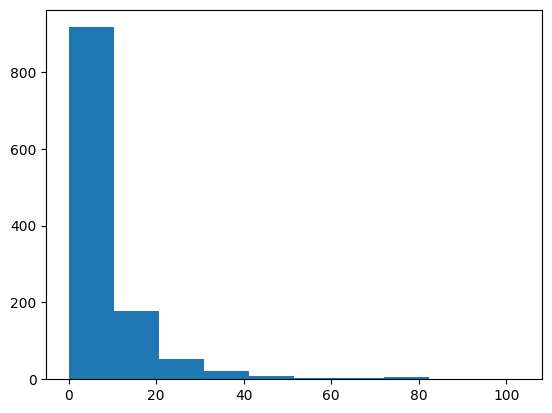

In [32]:
# Plot a histogram of the line lengths
plt.hist(line_num_words)
plt.show()

In [33]:
print('ok_')

ok_
